In [21]:
import pandas as pd

df = pd.read_csv('C:/Users/y2209/Git/homework2/github_bot_processed_data.csv')

print(df.head())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
None


In [23]:
print(df.describe())

       public_repos  public_gists     followers     following  text_bot_count
count  19768.000000  19768.000000  19768.000000  19768.000000    19768.000000
mean      84.139215     25.214083    245.497015     44.520741        0.061362
std      574.750217    635.690142   1535.939961    366.793439        0.341003
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%       11.000000      0.000000      7.000000      0.000000        0.000000
50%       35.000000      2.000000     33.000000      4.000000        0.000000
75%       83.000000     10.000000    125.000000     22.000000        0.000000
max    50000.000000  55781.000000  95752.000000  27775.000000        5.000000


In [33]:
import pandas as pd
import numpy as np

df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])
print(df)

       label  type  site_admin  company   blog  location  hireable  \
0      Human  True       False    False  False     False     False   
1      Human  True       False    False   True     False      True   
2      Human  True       False     True   True      True      True   
3        Bot  True       False    False  False      True     False   
4      Human  True       False    False  False     False      True   
...      ...   ...         ...      ...    ...       ...       ...   
19763    Bot  True       False     True   True      True     False   
19764  Human  True       False    False  False     False     False   
19765  Human  True       False     True  False      True     False   
19766  Human  True       False     True  False     False     False   
19767    Bot  True       False    False  False      True     False   

                                                     bio  public_repos  \
0                                                    NaN            26   
1      I ju

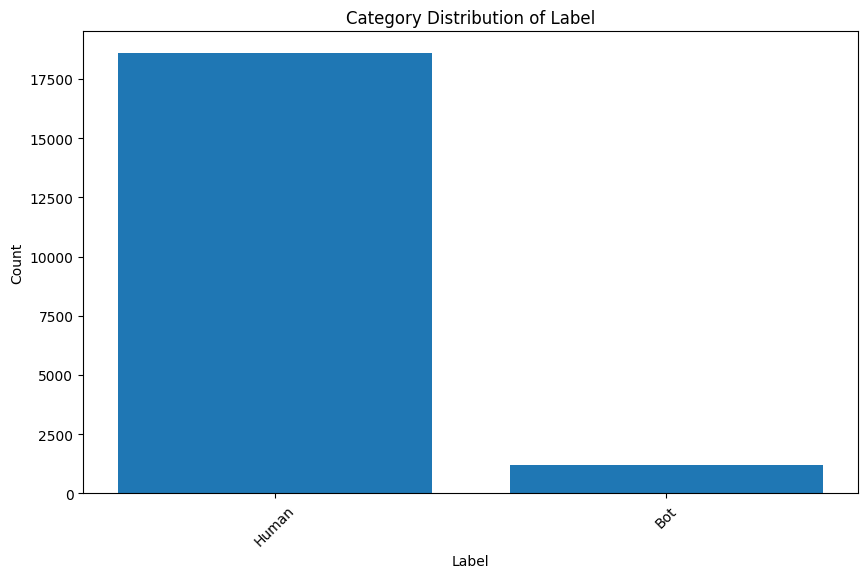

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Category Distribution of Label')
plt.xticks(rotation=45)
plt.show()


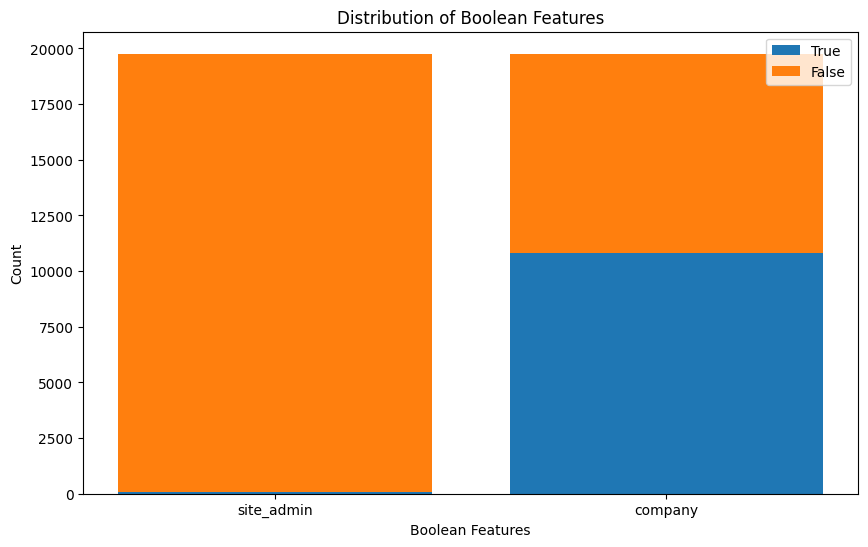

In [ ]:
bool_features = ['site_admin', 'company']  
bool_counts = df[bool_features].sum()
plt.figure(figsize=(10, 6))
plt.bar(bool_features, bool_counts, label='True')
plt.bar(bool_features, df[bool_features].count() - bool_counts, bottom=bool_counts, label='False')
plt.xlabel('Boolean Features')
plt.ylabel('Count')
plt.title('Distribution of Boolean Features')
plt.legend()
plt.show()

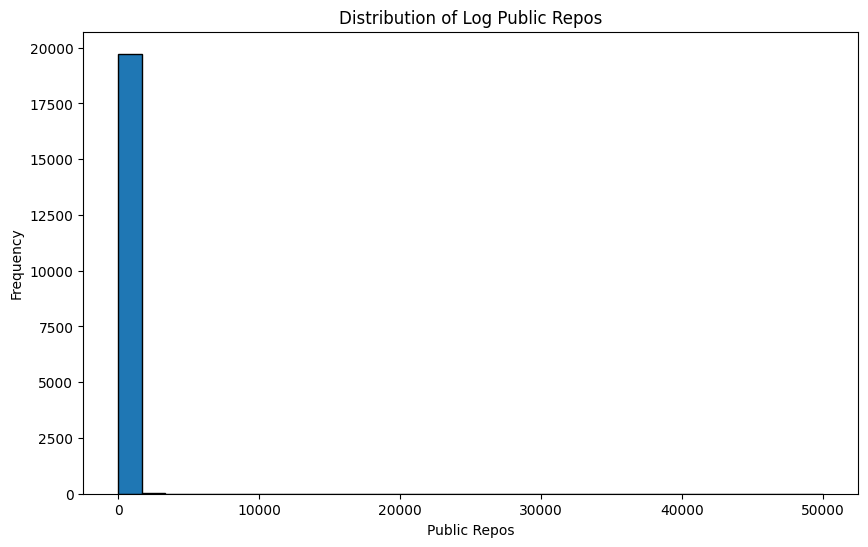

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['public_repos'], bins=30, edgecolor='black')
plt.xlabel('Public Repos')
plt.ylabel('Frequency')
plt.title('Distribution of Log Public Repos')
plt.show()


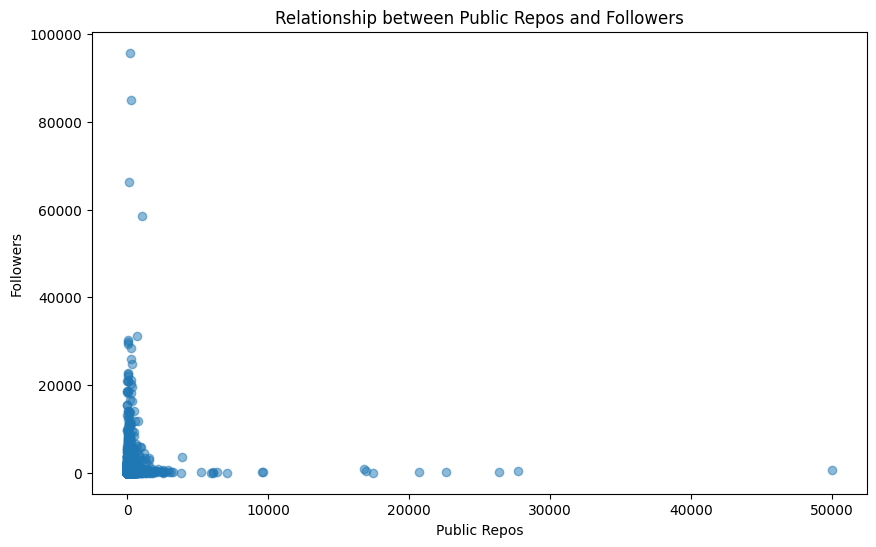

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['public_repos'], df['followers'], alpha=0.5)
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.title('Relationship between Public Repos and Followers')
plt.show()

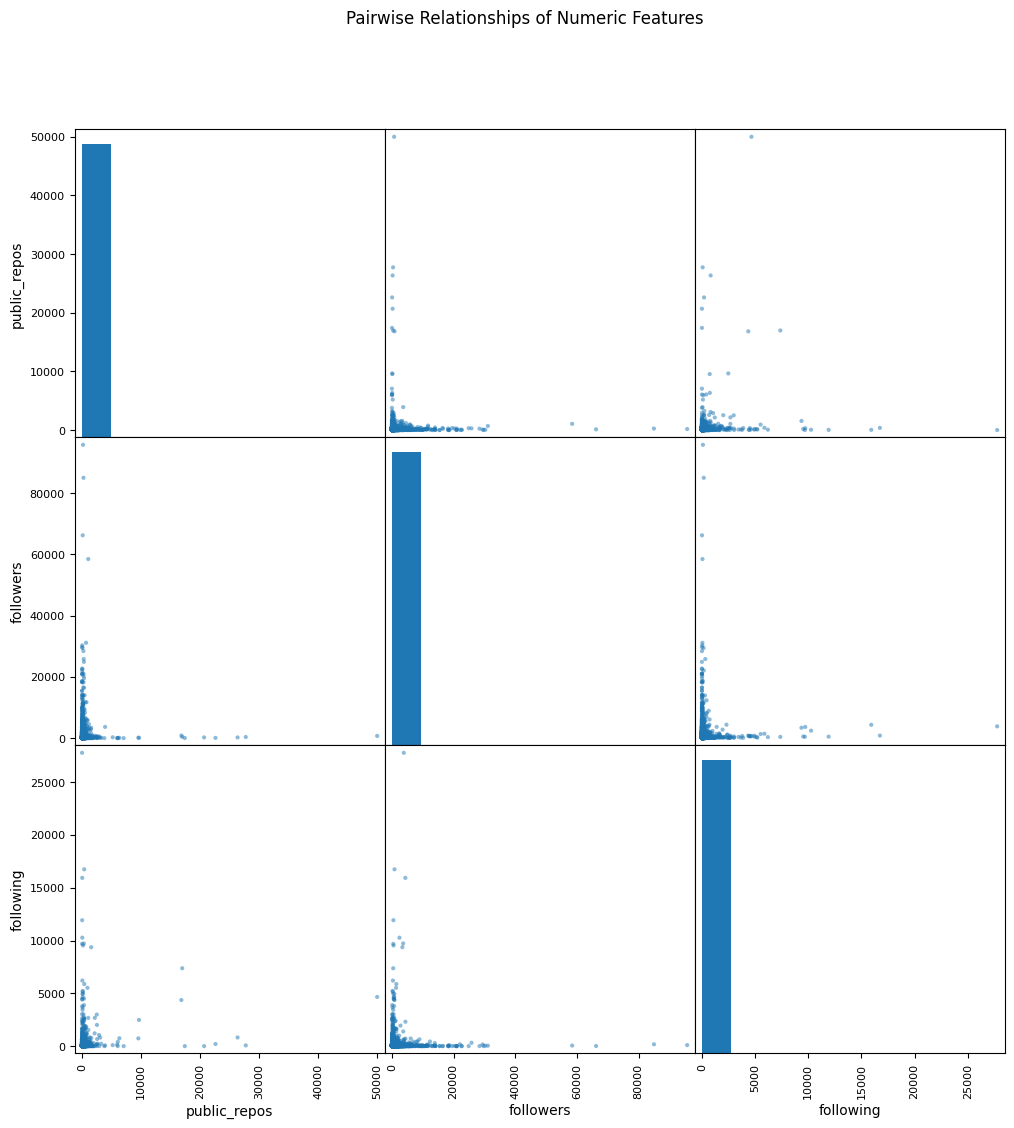

In [30]:
from pandas.plotting import scatter_matrix
numeric_features = ['public_repos', 'followers', 'following']  
scatter_matrix(df[numeric_features], figsize=(12, 12), diagonal='hist')
plt.suptitle('Pairwise Relationships of Numeric Features')
plt.show()

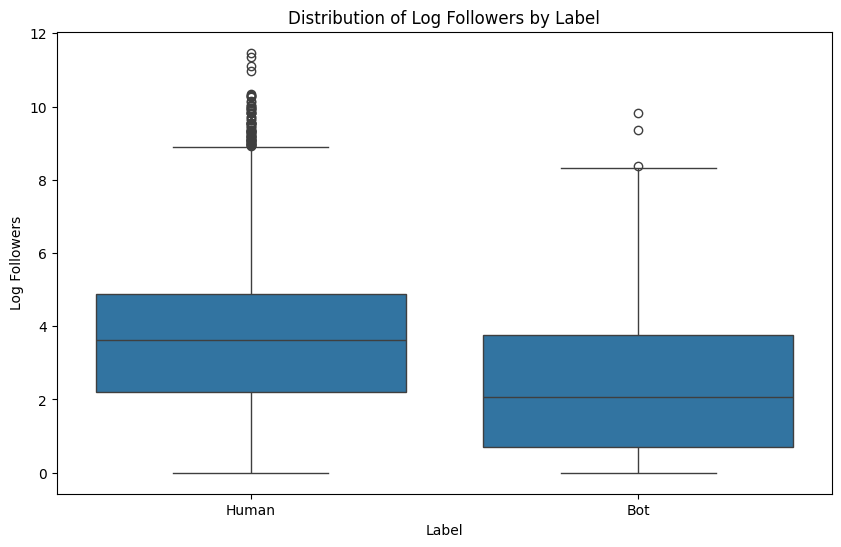

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df)
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.title('Distribution of Log Followers by Label')
plt.show()

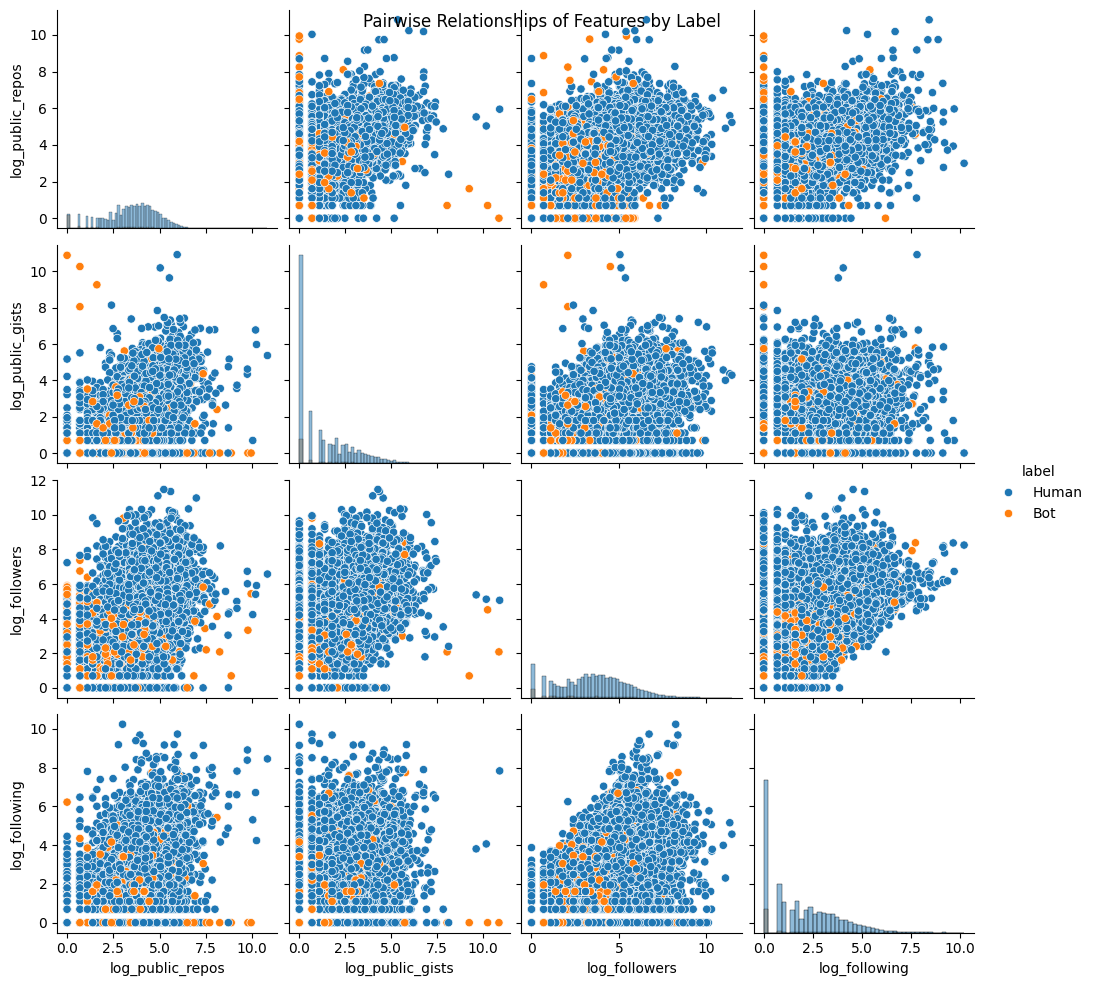

In [35]:
pairplot_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
sns.pairplot(df, vars=pairplot_features, hue='label', diag_kind='hist')
plt.suptitle('Pairwise Relationships of Features by Label')
plt.show()

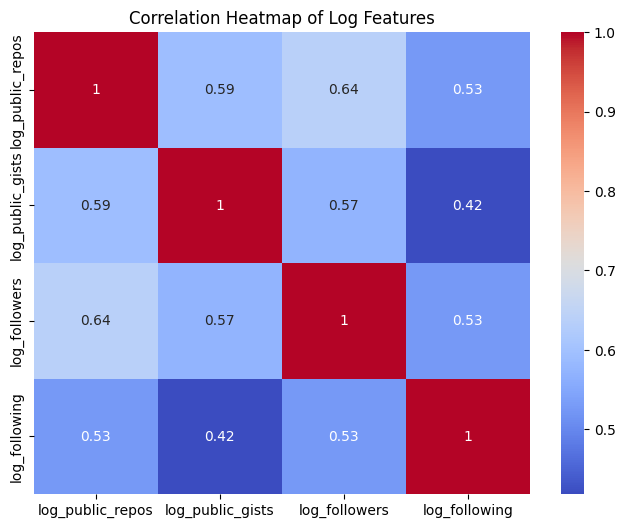

In [36]:
corr = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Log Features')
plt.show()

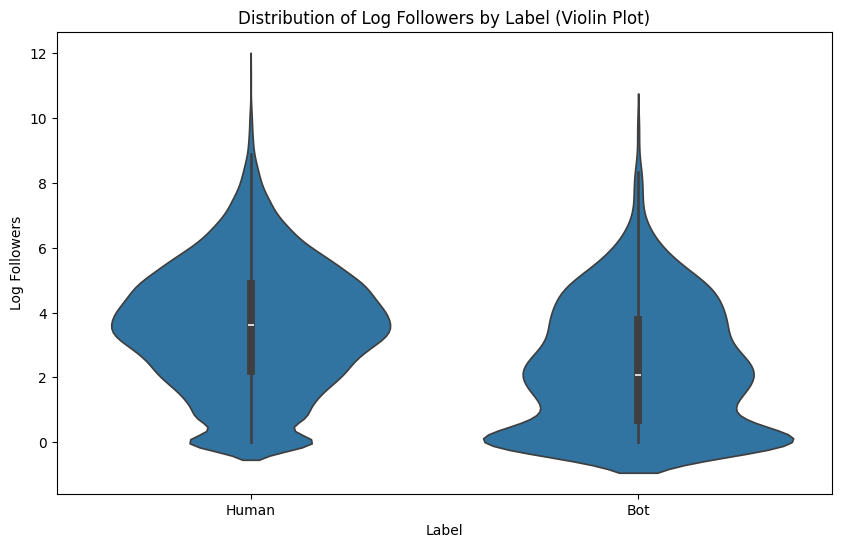

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=df)
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.title('Distribution of Log Followers by Label (Violin Plot)')
plt.show()

In [54]:
from pandas_profiling import ProfileReport
from pydantic_settings import BaseSettings
import os

class Settings(BaseSettings):
    data_file: str ='github_bot_processed_data.csv'
settings = Settings()

if not os.path.exists(settings.data_file):
    raise FileNotFoundError(f"The file {settings.data_file} does not exist.")

df = pd.read_csv(settings.data_file)

profile = ProfileReport(df, title="Data Analysis Report", explorative=True)

profile.to_file("data_profile.html")

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.9/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.9/u/import-error

In [57]:
from pandas_profiling import ProfileReport
from pydantic_settings import BaseSettings
import pandas as pd

# 定义设置类
class Settings(BaseSettings):
    data_file: str = 'github_bot_processed_data.csv'

# 加载设置
settings = Settings()

# 确保数据文件存在
if not os.path.exists(settings.data_file):
    raise FileNotFoundError(f"The file {settings.data_file} does not exist.")

# 加载数据文件
df = pd.read_csv(settings.data_file)

# 创建 ProfileReport 对象
profile = ProfileReport(df, title="Data Analysis Report", explorative=True)

# 保存报告为 HTML 文件
profile.to_file("data_profile.html")

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.9/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.9/u/import-error